### Data Preprocessing for ML Models

Before training models like **Logistic Regression**, **Support Vector Machine (SVM)**, **Neural Networks**, and **K-Nearest Neighbors (KNN)**, it's important to apply certain preprocessing steps to improve performance.

#### 1. Standard Scaling
- These models are **sensitive to the scale of features**.
- Features with larger ranges can dominate others and affect model performance.
- Solution: Use **StandardScaler** to scale all numeric features to have mean = 0 and standard deviation = 1.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
data_path = r"C:\Users\venka\PycharmProjects\Churn_analysis\Data\customer_churn_data.csv"
df = pd.read_csv(data_path)

In [3]:
df_clean = df.copy()

In [4]:
df_clean.drop( "CustomerID", axis=1, inplace=True)

In [6]:
# 2. Age: Use as-is or scale
scaler = StandardScaler()
df_clean["Age"] = scaler.fit_transform(df_clean[["Age"]])

In [7]:
# 3. Gender: Encode (Label Encoding or One-Hot Encoding)
df_clean["Gender"] = LabelEncoder().fit_transform(df_clean["Gender"])

In [8]:
# 4. Tenure: Log transform (add 1 to avoid log(0))
df_clean["Tenure"] = np.log1p(df_clean["Tenure"])

In [9]:
# 7. InternetService: Fill missing and One-Hot Encode
df_clean["InternetService"] = df_clean["InternetService"].fillna("Unknown")
df_clean = pd.get_dummies(df_clean, columns=["InternetService"], drop_first=True)

In [10]:
# 8. ContractType: One-Hot Encoding
df_clean = pd.get_dummies(df_clean, columns=["ContractType"], drop_first=True)

In [11]:
# 9. TechSupport: Label Encode
df_clean["TechSupport"] = LabelEncoder().fit_transform(df_clean["TechSupport"])

In [12]:
# 10. Churn: Convert to binary (Yes = 1, No = 0)
df_clean["Churn"] = df_clean["Churn"].map({"Yes": 1, "No": 0})

In [13]:
df_clean.head()

,Age,Gender,Tenure,MonthlyCharges,TotalCharges,TechSupport,Churn,InternetService_Fiber Optic,InternetService_Unknown,ContractType_One-Year,ContractType_Two-Year
0,0.441751,1,1.609438,88.35,353.40,1,1,True,False,False,False
1,-0.170941,1,0.000000,36.67,0.00,1,1,True,False,False,False
2,0.645982,0,1.098612,63.79,127.58,0,1,True,False,False,False
3,1.565021,0,2.197225,102.34,818.72,1,1,False,False,True,False
4,-0.273057,1,3.496508,69.01,2208.32,0,1,False,True,False,False


In [14]:
bool_cols = df_clean.select_dtypes(include='bool').columns
df_clean[bool_cols] = df_clean[bool_cols].astype(int)

In [15]:
df_clean.head()

,Age,Gender,Tenure,MonthlyCharges,TotalCharges,TechSupport,Churn,InternetService_Fiber Optic,InternetService_Unknown,ContractType_One-Year,ContractType_Two-Year
0,0.441751,1,1.609438,88.35,353.40,1,1,1,0,0,0
1,-0.170941,1,0.000000,36.67,0.00,1,1,1,0,0,0
2,0.645982,0,1.098612,63.79,127.58,0,1,1,0,0,0
3,1.565021,0,2.197225,102.34,818.72,1,1,0,0,1,0
4,-0.273057,1,3.496508,69.01,2208.32,0,1,0,1,0,0


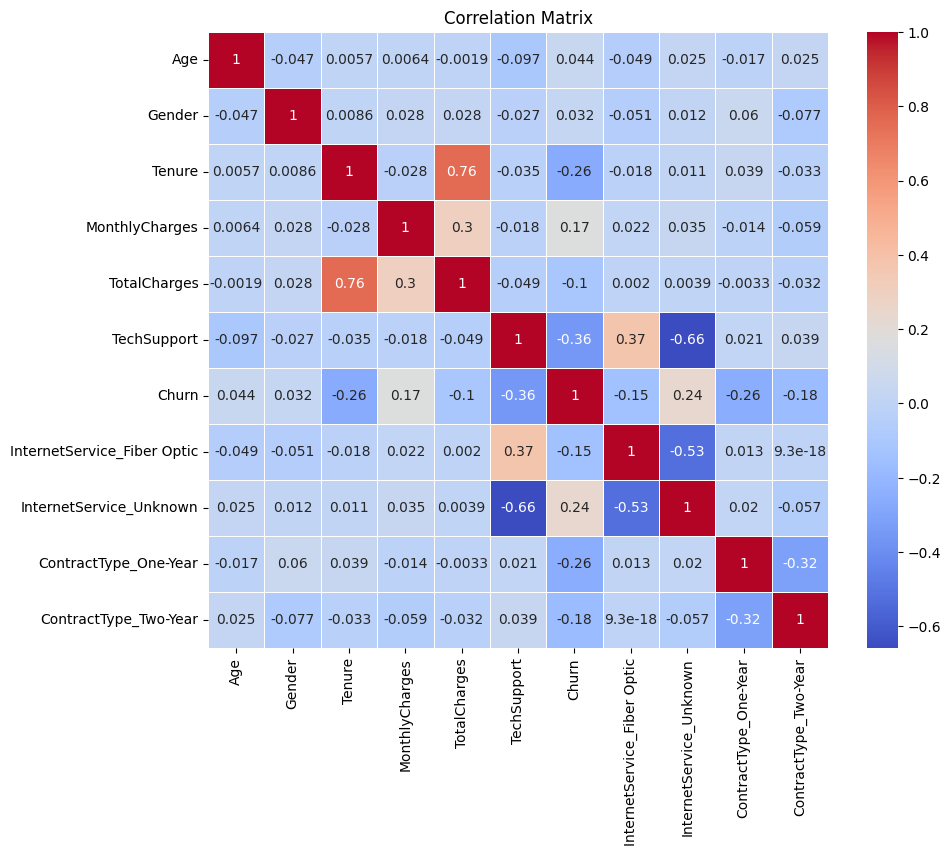

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix (only for numeric features)
corr_matrix = df_clean.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [17]:
df_clean.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'TechSupport', 'Churn', 'InternetService_Fiber Optic',
       'InternetService_Unknown', 'ContractType_One-Year',
       'ContractType_Two-Year'],
      dtype='object')

In [18]:
n=df_clean[['Age', 'Gender', 'Tenure', 'MonthlyCharges', 'TechSupport',
       'InternetService_Fiber Optic', 'InternetService_Unknown',
       'ContractType_One-Year', 'ContractType_Two-Year']]

In [19]:
y=df_clean['Churn']

In [20]:
n.head()

,Age,Gender,Tenure,MonthlyCharges,TechSupport,InternetService_Fiber Optic,InternetService_Unknown,ContractType_One-Year,ContractType_Two-Year
0,0.441751,1,1.609438,88.35,1,1,0,0,0
1,-0.170941,1,0.000000,36.67,1,1,0,0,0
2,0.645982,0,1.098612,63.79,0,1,0,0,0
3,1.565021,0,2.197225,102.34,1,0,0,1,0
4,-0.273057,1,3.496508,69.01,0,0,1,0,0


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(n, y, test_size=0.25, random_state=42)

In [22]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [23]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [24]:
import joblib
joblib.dump(scaler, "scaler2.pkl")

['scaler2.pkl']

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


LOGISTIC REGRESSION


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(x_train_res, y_train_res)

C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [28]:
y_pred=logmodel.predict(x_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.97      0.64        33
           1       0.99      0.84      0.91       217

    accuracy                           0.86       250
   macro avg       0.74      0.90      0.78       250
weighted avg       0.93      0.86      0.87       250



In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
params_grid = {
    "n_neighbors": [1, 3, 5, 7, 9, 11, 15, 21],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}


In [32]:
gridknn = GridSearchCV(KNeighborsClassifier(), params_grid, cv=5)

In [33]:
gridknn.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 21],
                         'weights': ['uniform', 'distance']})

In [34]:
gridknn.best_params_

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

In [35]:
y_pred1_knn = gridknn.predict(x_test)

In [36]:
print(classification_report(y_test, y_pred1_knn))

              precision    recall  f1-score   support

           0       0.41      0.58      0.48        33
           1       0.93      0.88      0.90       217

    accuracy                           0.84       250
   macro avg       0.67      0.73      0.69       250
weighted avg       0.86      0.84      0.85       250



In [37]:
from sklearn.svm import SVC

In [38]:
model = SVC(C=0.1, gamma='scale', kernel='rbf')


In [39]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

In [40]:
grid_search = GridSearchCV(estimator=SVC(), 
                           param_grid=param_grid_svm, 
                           refit=True, 
                           verbose=2, 
                           cv=5)

In [41]:
grid_search.fit(x_train_res, y_train_res)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [42]:
grid_search.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [47]:
y_pred_svm= grid_search.predict(x_test)

In [48]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        33
           1       0.93      0.93      0.93       217

    accuracy                           0.88       250
   macro avg       0.74      0.75      0.74       250
weighted avg       0.88      0.88      0.88       250



In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [96]:
grid_search_DT = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                           param_grid=param_grid_decision_tree, 
                           refit=True, 
                           verbose=2, 
                           cv=5)

In [153]:
grid_search_DT.fit(x_train_res, y_train_res)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [154]:
grid_search_DT.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [155]:
y_pred2= grid_search_DT.predict(x_test)

In [156]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        33
           1       1.00      0.95      0.98       217

    accuracy                           0.96       250
   macro avg       0.88      0.98      0.92       250
weighted avg       0.97      0.96      0.96       250



In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
param_grid_random_forest = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [122]:
grid_search_RF= GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid_random_forest, 
                           refit=True, 
                           verbose=2, 
                           cv=5,
                           n_jobs=-1)

In [157]:
grid_search_RF.fit(x_train_res, y_train_res)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [158]:
grid_search_RF.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [159]:
y_pred3= grid_search_RF.predict(x_test)

In [160]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        33
           1       1.00      0.95      0.97       217

    accuracy                           0.96       250
   macro avg       0.88      0.97      0.92       250
weighted avg       0.97      0.96      0.96       250



In [161]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 6.3 MB/s eta 0:00:24
   ---------------------------------------- 1.8/150.0 MB 5.3 MB/s eta 0:00:28
    --------------------------------------- 2.1/150.0 MB 4.9 MB/s eta 0:00:31
    --------------------------------------- 2.6/150.0 MB 3.1 MB/s eta 0:00:48
    --------------------------------------- 3.7/150.0 MB 3.6 MB/s eta 0:00:41
    --------------------------------------- 3.7/150.0 MB 3.6 MB/s eta 0:00:41
   - -------------------------------------- 4.5/150.0 MB 3.0 MB/s eta 0:00:49
   - -------------------------------------- 5.5/150.0 MB 3.3 MB/s eta 0:00:44
   - -------------------------------------- 6.3/150.0 MB 3.4 MB/s eta 0:00:43
   - -------------------------------------- 7.1/150.0 MB 3.4 MB/s eta 0:00:42
   -- ------------------------------------- 7.6/150.0 MB 3.3 MB/s eta 0

In [162]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [163]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train_res, y_train_res)

y_pred_xgb = xgb_model.predict(x_test)


C:\Users\venka\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [13:59:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [164]:
print(classification_report(y_test, y_pred_xgb))



              precision    recall  f1-score   support

           0       0.77      1.00      0.87        33
           1       1.00      0.95      0.98       217

    accuracy                           0.96       250
   macro avg       0.88      0.98      0.92       250
weighted avg       0.97      0.96      0.96       250



In [165]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train_res, y_train_res)

y_pred_gb = gb_model.predict(x_test)

In [166]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        33
           1       1.00      0.94      0.97       217

    accuracy                           0.94       250
   macro avg       0.85      0.97      0.90       250
weighted avg       0.96      0.94      0.95       250



Due to its robustness to overfitting, ability to handle imbalance well, and superior accuracy, **XGBoost** is selected as our final model for customer churn analysis.

In [167]:
joblib.dump(grid_search_RF, "XGBOOST.pkl")

['XGBOOST.pkl']